In [1]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
# Load data
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
dt=DecisionTreeClassifier()

In [4]:
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [5]:
y_pred= dt.predict(X_test)

In [6]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [7]:
accuracy= accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333

In [8]:
print('\n Classification report:\n', classification_report(y_test, y_pred))


 Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.94      0.88      0.91        17
           2       0.88      0.93      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



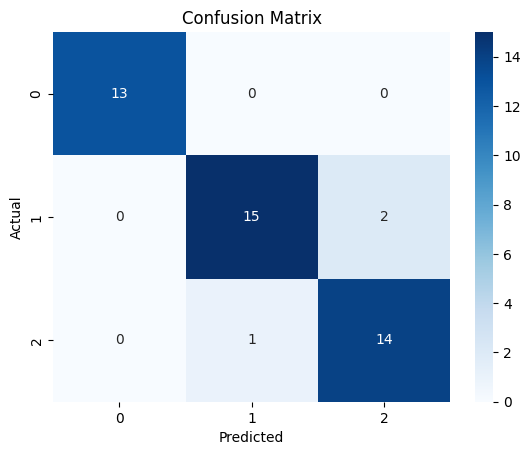

In [9]:
# Confusion Matrix
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

## Pruning: Reduces complexity by trimming less significant branches
### How It Works
- Start at the Root Node – Use the entire dataset.
- Choose the Best Feature – Split based on a criterion like Information Gain or Gini Impurity.
- Split the Dataset – Based on feature value thresholds.
- Repeat Recursively – On the resulting subsets until a stopping condition is met (e.g., max depth, pure nodes).
- Assign Outputs – At leaf nodes based on majority class (for classification)

A **decision tree** is a versatile, tree‑structured model used for decision-making and predictive tasks



It's a flowchart-like graph starting with a root node (your initial question or decision), branching into internal (decision/uncertainty) nodes, and ending in leaf nodes (final outcomes or classes)

Used for both classification (categorical outcomes) and regression (continuous predictions) . E.g., an internal node might test "Age < 50?", and the leaves would represent predicted classes or values.



- Select a feature to split on, using a criterion like information gain or Gini impurity (e.g., ID3 or C4.5 algorithms)
- Partition the dataset based on that feature’s values, branching into sub-nodes.
- Repeat recursively for each branch until stopping criteria are met (pure leaf, no features, or depth limit).
- Optionally, prune branches to avoid overfitting by removing low-value splits after tree growth 



                                                                                          

SVC is a classification algorithm from the Support Vector Machines (SVM) family. It finds the optimal hyperplane that separates data points of different classes with the maximum margin.
Works well for binary and multi-class classification.
Can handle linear and non-linear data using kernels.

The algorithm tries to find a decision boundary (hyperplane) such that the distance (margin) between the closest points of each class (support vectors) is maximized.
It uses kernel functions to handle non-linear separation by mapping data to higher dimensions.

In [10]:
from sklearn.svm import SVC

In [11]:
svc= SVC()

In [12]:
svc.fit(X_train, y_train)

SVC()

In [13]:
y_pred_svc= svc.predict(X_test)

In [14]:
accuracy= accuracy_score(y_test, y_pred_svc)
accuracy

0.9333333333333333

In [15]:
print('\n Classification Report: \n', classification_report(y_test, y_pred_svc))


 Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       0.89      0.94      0.91        17
           2       0.93      0.87      0.90        15

    accuracy                           0.93        45
   macro avg       0.94      0.94      0.94        45
weighted avg       0.93      0.93      0.93        45



In [16]:
# confusion Matrix
conf_matrix= confusion_matrix(y_test, y_pred_svc)

<Axes: >

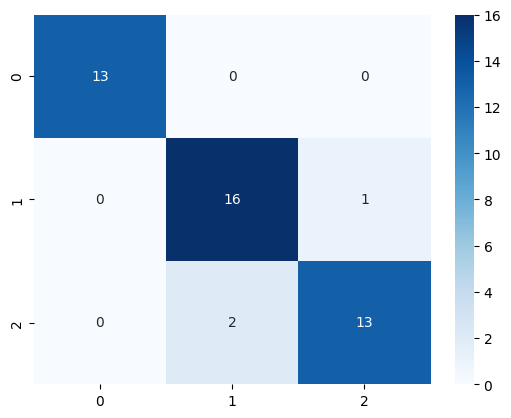

In [17]:
#heatmap
sns.heatmap(conf_matrix,annot=True, fmt='d',cmap='Blues')


In [18]:
from sklearn.datasets import make_classification

In [19]:
#Step 1: Generate synthetic classification data
X, y = make_classification(n_samples=1000, n_features=10, 
                           n_informative=5, n_redundant=2, 
                           n_classes=2, random_state=42)

In [21]:
import pandas as pd
df = pd.DataFrame(X, columns=[f'feature_{i+1}' for i in range(10)])
df['target'] = y


In [22]:
df

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,target
0,1.125100,1.178124,0.493516,0.790880,-0.614278,1.347020,1.419515,1.357325,0.966041,-1.981139,1
1,-0.564641,3.638629,-1.522415,-1.541705,1.616697,4.781310,3.190292,-0.890254,1.438826,-3.828748,0
2,0.516313,2.165426,-0.628486,-0.386923,0.492518,1.442381,1.332905,-1.958175,-0.348803,-1.804124,0
3,0.537282,0.966618,-0.115420,0.670755,-0.958516,0.871440,0.508186,-1.034471,-1.654176,-1.910503,1
4,0.278385,1.065828,-1.724917,-2.235667,0.715107,0.731249,-0.674119,0.598330,-0.524283,1.047610,0
...,...,...,...,...,...,...,...,...,...,...,...
995,-0.906303,-0.527162,-1.511787,-1.697166,-0.585131,0.160046,-2.225249,1.480886,-0.934154,1.151678,0
996,1.225603,-1.389881,-0.406775,-1.606446,2.500944,-1.089977,0.452517,-1.765429,1.297249,4.705105,1
997,1.650153,-0.692165,-2.049206,-1.610471,0.119157,-0.876080,-1.368269,-1.302577,-1.285505,3.328569,1
998,-1.186603,-1.414598,-0.121520,-1.440709,1.630283,-2.034632,-1.537456,-1.421465,-0.028340,3.413932,1
